# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [2]:
df = pd.read_csv("data_for_lr.csv")

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
dfr=df.copy()

In [7]:
dfr.dropna(inplace=True)

In [8]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [9]:
# splitting date in training data and testing data
train_input= np.array(dfr.x[0:500]).reshape(500,1)
train_output= np.array(dfr.y[0:500]).reshape(500,1)

# validation dataset
test_input= np.array(dfr.x[500:]).reshape(199,1)
test_output= np.array(dfr.y[500:]).reshape(199,1)

In [10]:
print(f"The shape of training input data is {train_input.shape}")
print(f"The shape of training output data is {train_output.shape}")
print(f"The shape of testing input data is {test_input.shape}")
print(f"The shape of testing output data is {test_input.shape}")

The shape of training input data is (500, 1)
The shape of training output data is (500, 1)
The shape of testing input data is (199, 1)
The shape of testing output data is (199, 1)


# <font color= "green"> Linear Regression </font>

# Forward Propagation
f(x)=m*x+c

In [11]:
def forward_propagation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    predictions = np.multiply(m,train_input)+c
    return predictions

# Rough

In [12]:
a=dict()
a[1]=np.array([1,2,4,5,5])
a[2]=np.array([3,4,5,6,6])

In [13]:
b=a[1]

In [14]:
b

array([1, 2, 4, 5, 5])

In [15]:
c=a[2]

In [16]:
c

array([3, 4, 5, 6, 6])

In [17]:
np.multiply(b,c)+5

array([ 8, 13, 25, 35, 35])

# Cost Function
cf= (summation(f(x)-y)^2))/2*n

In [18]:
def Cost_function(predictions,train_output):
    cost= np.mean((predictions-train_output)**2)*0.5
    return cost

# Gradient Descent for back propagation
df=(f(x)-y)/n

dm=df*x

dc=df*1


In [19]:
def Gradient_Descent(train_input,train_output,predictions):
    derivatives=dict()
    df=(predictions-train_output)  # mean will be taken in dm and dc
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

# Update Parameters
m=m-learning_rate*d(cost)/d(m)

c=c-learning_rate*d(cost)/d(c)

In [20]:
def Update_parameters(parameters,derivatives,learning_rate):
    parameters['m']=parameters['m']-learning_rate*derivatives['dm']
    parameters['c']=parameters['c']-learning_rate*derivatives['dc']
    return parameters

# Training Model

In [24]:
def train(train_input,train_output,learning_rate,iters):
    # assigning random parameters
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters['c']=np.random.uniform(0,-1)

    plt.figure()  # for visualization

    #loss
    loss= list()
    # iterations
    for i in range(iters):
        # forward propagation
        predictions= forward_propagation(train_input,parameters)

        # Cost Function
        cost= Cost_function(predictions,train_output)
        loss.append(cost)
        print(f"iteration ={i+1} , loss= {cost}")

        #plot
        fig,ax= plt.subplots()
        ax.plot(train_input,train_output, '+', label= "original")
        ax.plot(train_input,predictions, '+', label= 'training')
        legend=ax.legend()

        plt.plot(train_input,train_output, '+', label= "original")
        plt.plot(train_input,predictions, '+', label= 'training')
        plt.show()

        # Gradient Descent for back propagation
        derivatives=Gradient_Descent(train_input,train_output,predictions)

        # Update Parameters
        parameters= Update_parameters(parameters,derivatives,learning_rate)
    return parameters,loss

# Training

iteration =1 , loss= 769.9283728692978


<Figure size 640x480 with 0 Axes>

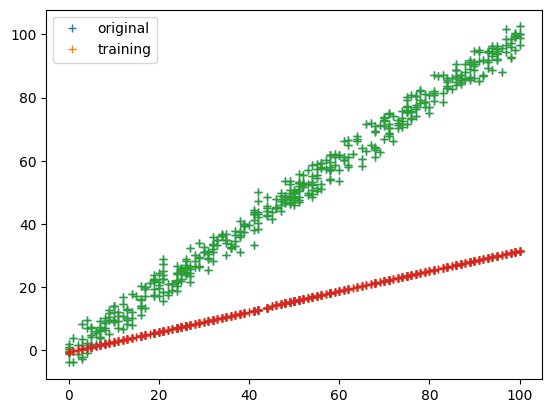

iteration =2 , loss= 351.45985746158055


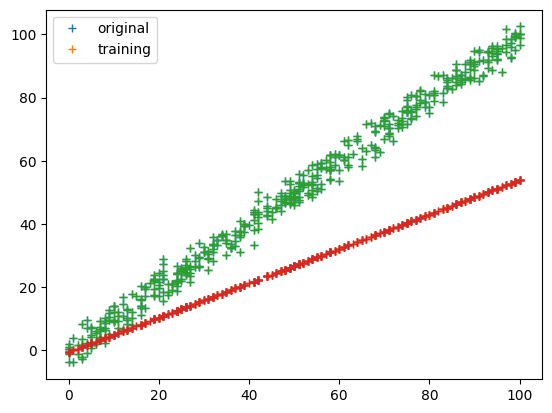

iteration =3 , loss= 161.60022819196246


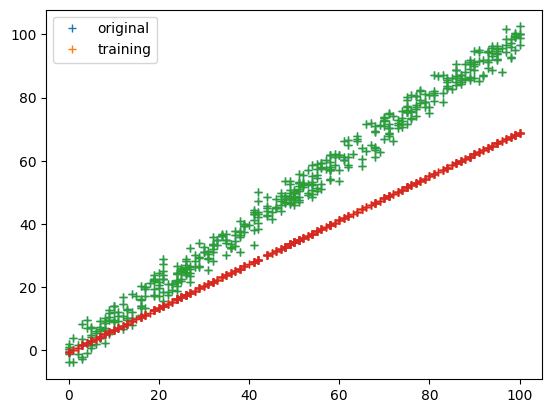

iteration =4 , loss= 75.4607037798403


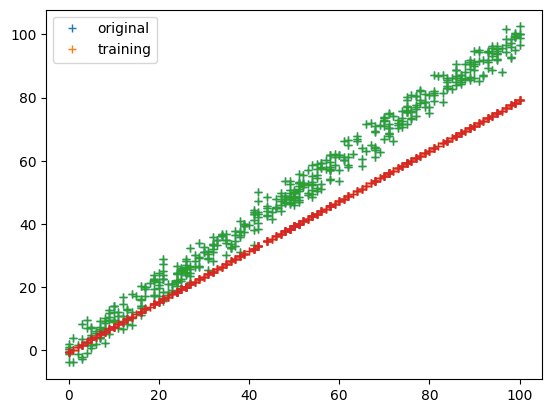

iteration =5 , loss= 36.37910582624273


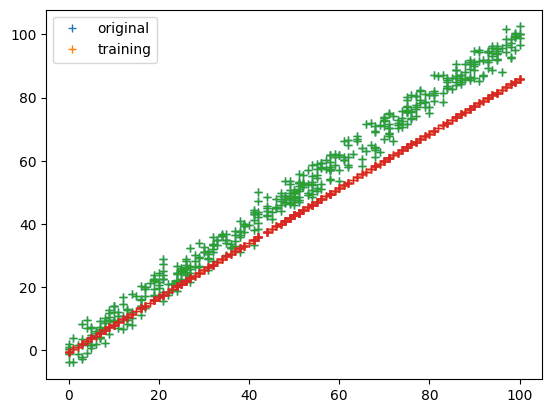

iteration =6 , loss= 18.647741230192462


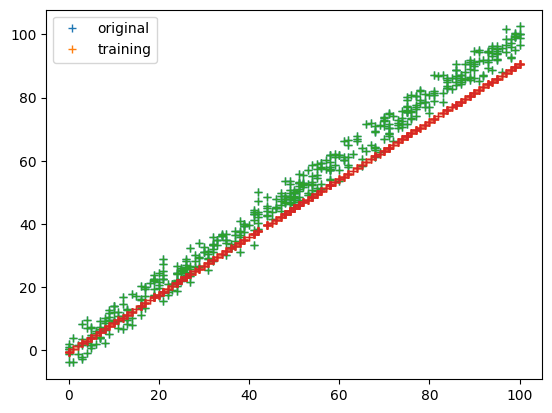

iteration =7 , loss= 10.603001156875736


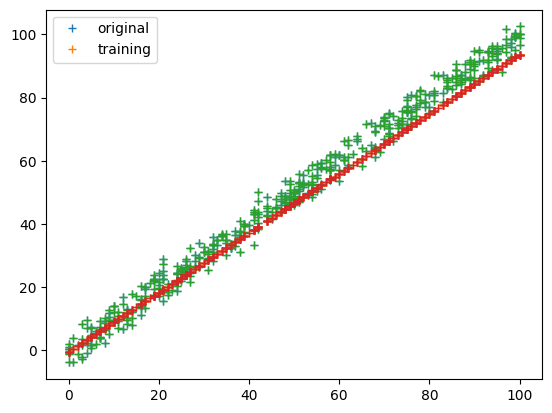

iteration =8 , loss= 6.953093358843694


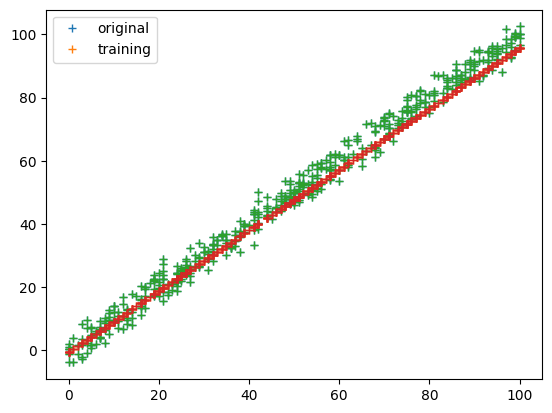

iteration =9 , loss= 5.29712583202161


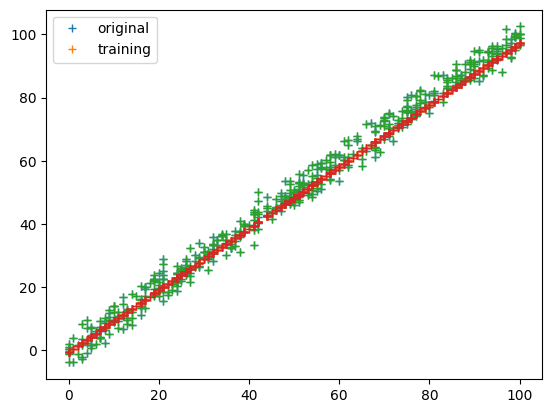

iteration =10 , loss= 4.545811214833811


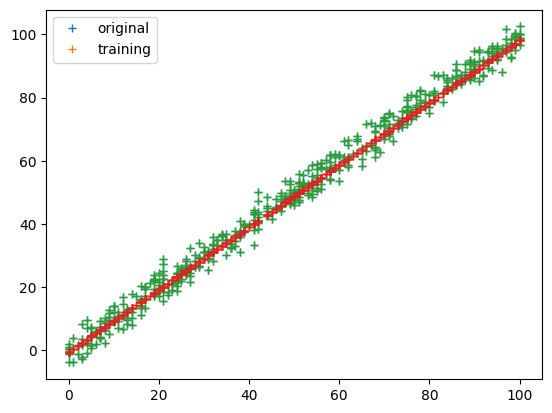

iteration =11 , loss= 4.204938624793862


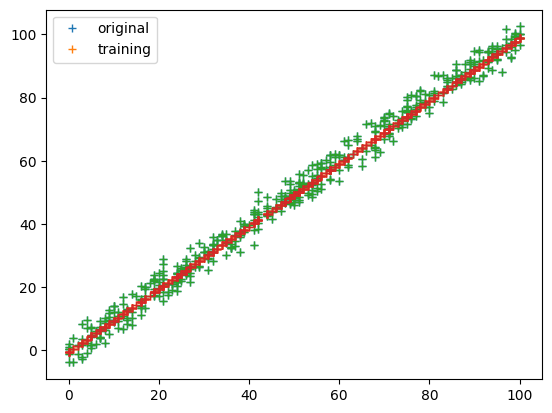

iteration =12 , loss= 4.05028403710931


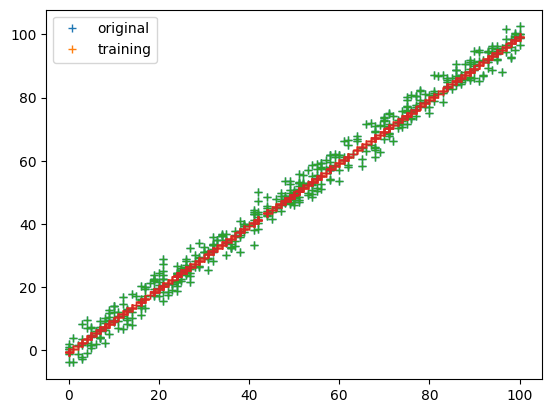

iteration =13 , loss= 3.98011676337206


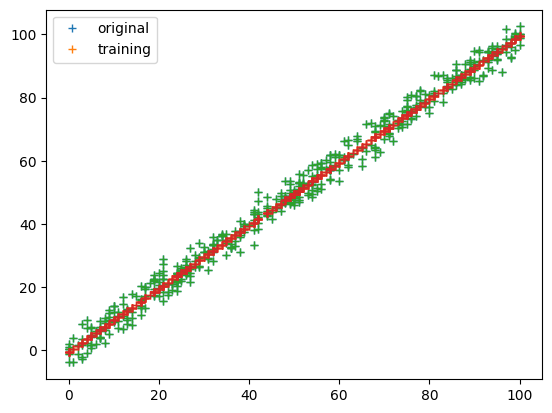

iteration =14 , loss= 3.948281477570249


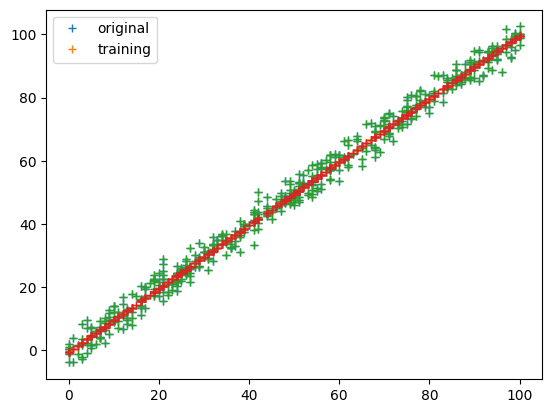

iteration =15 , loss= 3.933837457168753


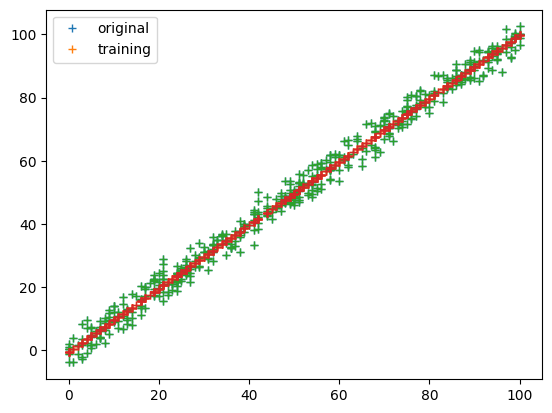

iteration =16 , loss= 3.9272838731585797


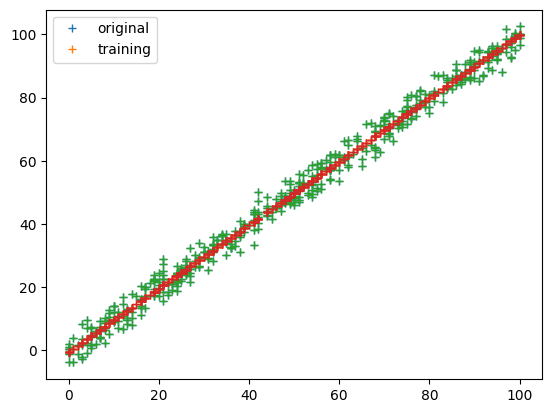

iteration =17 , loss= 3.924310188894837


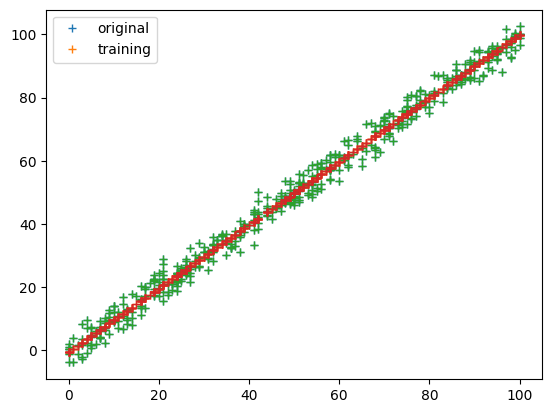

iteration =18 , loss= 3.9229607091272105


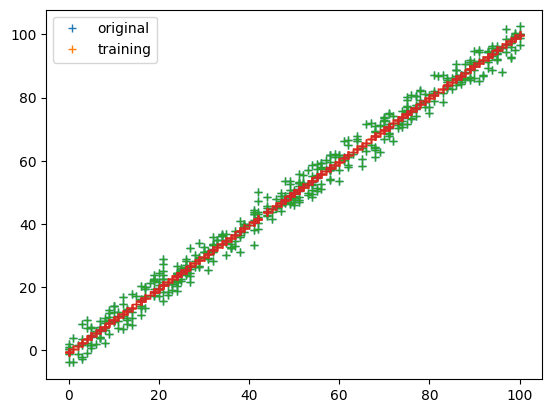

iteration =19 , loss= 3.92234813275442


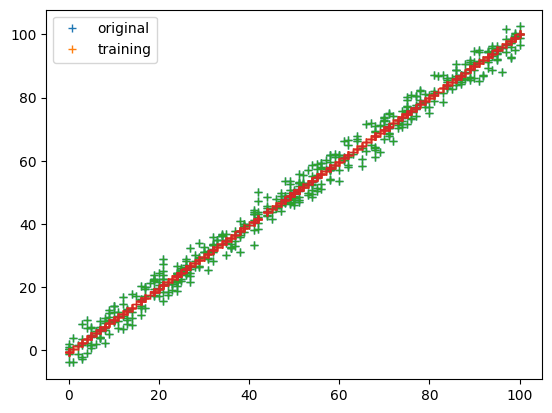

iteration =20 , loss= 3.922069890284005


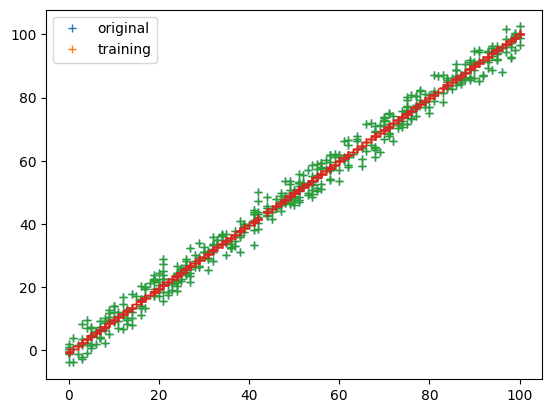

In [25]:
parameters,loss= train(train_input,train_output,0.0001,20)